# Import and download data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg 
import math

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten, Conv2D, Conv2DTranspose, Dropout, MaxPooling2D,GlobalAveragePooling2D,GlobalAveragePooling1D
from keras import applications
import tensorflow as tf

from tensorflow.keras.applications import ResNet50
from keras.preprocessing.image import  ImageDataGenerator 
from keras.applications.resnet50 import preprocess_input

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
!pip3 install scikit-plot

In [ ]:
# !gdown --id 1rXl6cSoxUS1BtOi0tHreiLmVCw6BdWgb #dataset full
# !gdown --id 1tupq1BBr5YBdMKAOZa9o8nOcmDXOEXU6 #dataset.txt
# !gdown --id 1ODNbd8Nux85hZ4u7BzxwfuPU4aiJeuIx #dataset train & test
# !gdown --id 1Gc1DxZLiTUg5DClnwp78NIIOEVuTRtqo #dataset cropped & uncropped train & test
# !gdown --id 1uy4iB8L51gj3Ij1TgPTeEo_w41YZu_Hc #dataset just cropped train & test
# !gdown --id 1oEAIGg69RBWVYK4l4GUB7ah2tV2R4pqv #dataset just cropped labeled names train & test
# !gdown --id 1SVG-OfLVQdC1e7p0n5UwN_zZkjb6r5IW #dataset just cropped manually augmented train & test
!gdown --id 1-SfOiMVPogJfucwua60VMoqadCNONZ9s #dataset just cropped manually augmented train & test

# !unzip plate_dataset.zip
# !unzip plate_dataset_train_test.zip
# !unzip plate_dataset_cropped_uncropped_train_test.zip
# !unzip plate_dataset_cropped_train_test.zip
# !unzip plate_dataset_train_test_manualcropped.zip
!unzip plate_dataset_train_test_manual_cropped_merged.zip

Downloading...
From: https://drive.google.com/uc?id=1-SfOiMVPogJfucwua60VMoqadCNONZ9s
To: /content/plate_dataset_train_test_manual_cropped_merged.zip
16.5MB [00:00, 45.3MB/s]
Archive:  plate_dataset_train_test_manual_cropped_merged.zip
   creating: new_added_dataset/
   creating: new_added_dataset/test/
   creating: new_added_dataset/test/0/
  inflating: new_added_dataset/test/0/0014.jpg  
  inflating: new_added_dataset/test/0/0026.jpg  
  inflating: new_added_dataset/test/0/0034.jpg  
  inflating: new_added_dataset/test/0/0035.jpg  
  inflating: new_added_dataset/test/0/0037.jpg  
  inflating: new_added_dataset/test/0/0047.jpg  
  inflating: new_added_dataset/test/0/0057.jpg  
  inflating: new_added_dataset/test/0/0061.jpg  
  inflating: new_added_dataset/test/0/0062.jpg  
  inflating: new_added_dataset/test/0/0066.jpg  
  inflating: new_added_dataset/test/0/0072.jpg  
  inflating: new_added_dataset/test/0/0082.jpg  
  inflating: new_added_dataset/test/0/0086.jpg  
  inflating: new_ad

## An example from dataset

In [ ]:
# BASE_PATH = '/content/drive/MyDrive/stanford_car_dataset/'
BASE_PATH = 'new_added_dataset'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'train')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'test')

(36, 194, 3)


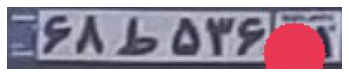

In [ ]:
image = mpimg.imread(os.path.join(DATA_TRAIN_PATH, '1/0001.jpg'))

print(image.shape)

plt.imshow(image)
plt.axis('off')
plt.show()

# Plotter

In [ ]:
"""## Plot"""
def HistoryPlotter(history):
    # print(history.history.keys())
    plt.title('model accuracy')
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.title('model loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


def CompareResult(x, y, y_predicted):
    plt.scatter(x, y, label='Actual')
    plt.scatter(x ,y_predicted, label='Predicted')
    plt.title('Train Data')
    plt.xlabel('Input Variable (x)')
    plt.ylabel('Output Variable (y)')
    plt.legend()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  
import scikitplot as skplt


def PlotConfusionMatrix(class_labels, true_classes):
    [print(k, ":", v) for k,v in enumerate(class_labels)]
    true_map_classes = [class_labels[x] for x in true_classes]
    predicted_map_classes = [class_labels[x] for x in predicted_classes]

    skplt.metrics.plot_confusion_matrix(
        true_map_classes, 
        predicted_map_classes,
        labels=class_labels,
        x_tick_rotation=90,
        figsize=(12,12))

In [ ]:
from sklearn.metrics import classification_report


def PlotMany(predicted_classes, true_classes, predictions):
    report = classification_report(
        true_classes,
        predicted_classes,
        target_names=class_labels)
    print(report)


# Resnet 


## set hyperparameters

In [ ]:
IMG_WIDTH, IMG_HEIGHT = 224, 224
EPOCHS = 5
BATCH_SIZE= 16
VERBOSITY = 2
n_classes = 2
n_channels = 3
VERBOSITY = 1

In [ ]:
from keras.applications.vgg16 import preprocess_input
# train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)



train_datagen = ImageDataGenerator(rotation_range=20,brightness_range=[0.5,1.5])

#test_generator
test_datagen = ImageDataGenerator(
    rotation_range=20,brightness_range=[0.5,1.5])

train_generator = train_datagen.flow_from_directory(DATA_TRAIN_PATH,
                                                     target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='binary')

test_generator = test_datagen.flow_from_directory(DATA_TEST_PATH,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary')

Found 2543 images belonging to 2 classes.
Found 642 images belonging to 2 classes.


## build and train model

In [ ]:
def build_model_resnet50():
    model = Sequential()
    
    base_model = ResNet50(weights='imagenet', include_top=False, pooling ='avg')
    model.add(base_model)
    model.layers[0].trainable = False
    print("\nlayers***********",len(model.layers),"\n")
    # for layer in model.layers[:40]:
    #     layer.trainable = False
    
    model.add(Dense(1024, activation = 'relu')) 

    # x = base_model.output
    # x = GlobalAveragePooling2D()(x)
    # x = Dropout(0.7)(x)
    # predictions = Dense(num_classes, activation= 'softmax')(x)
    # model = Model(inputs = base_model.input, outputs = predictions)

    # model.add(GlobalAveragePooling1D())
    model.add(Dropout(0.7))
    model.add(Dense(1, activation = 'softmax')) 
    return model

def build_model_CNN():
    model = Sequential()

    model.add(InputLayer(input_shape=(IMG_WIDTH, IMG_HEIGHT, n_channels)))

    model.add(BatchNormalization())

    model.add(Conv2D(filters=64, kernel_size=(4, 4), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.2))

    model.add(Conv2D(filters=64, kernel_size=(4, 4), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.35))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(64, activation='relu'))

    model.add(BatchNormalization())

    model.add(Dense(1, activation='softmax'))
    return model

# def build_model_c():

    

In [ ]:
# model = build_model_with_resnet50()
from keras.optimizers import SGD,Adam

# model = build_model_CNN()
model = build_model_resnet50()

loss = 'binary_crossentropy' 
optimizer = Adam(lr=1e-4)
# optimizer = SGD(lr=0.000001)
# optimizer = 'adam'


# class_weight = {0 : 0.13, 1 : 0.87}
# model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
history = model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                    # class_weight=class_weight, 
                    verbose=VERBOSITY,
                          validation_data=test_generator)

# model.fit(train_generator_aug, epochs=EPOCHS, batch_size=BATCH_SIZE, class_weight=class_weight)
HistoryPlotter(history)

#Mobile net

In [ ]:
img_height,img_width = 224,224
num_classes = 1

base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height,img_width,3),include_top=False,weights='imagenet')
base_model.trainable = True

inputs = keras.Input(shape=(img_height,img_width,3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(64,activation= 'relu',kernel_initializer='he_uniform')(x)
x = Dropout(0.7)(x)
x = keras.layers.Dense(16,activation= 'relu',kernel_initializer='he_uniform')(x)
outputs = keras.layers.Dense(1,activation= 'sigmoid')(x)
model_D = keras.Model(inputs, outputs)


9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
model_D.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                81984     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17    

In [ ]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
# model_D.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])
base_learning_rate = 0.0001

model_D.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),

              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),

              metrics=['accuracy','MeanSquaredError'])

Epoch 1/20
159/159 [==============================] - 55s 281ms/step - loss: 0.7369 - accuracy: 0.5216 - mean_squared_error: 0.2654 - val_loss: 0.6147 - val_accuracy: 0.6916 - val_mean_squared_error: 0.2117
Epoch 2/20
159/159 [==============================] - 44s 275ms/step - loss: 0.5243 - accuracy: 0.7329 - mean_squared_error: 0.1748 - val_loss: 0.4609 - val_accuracy: 0.7710 - val_mean_squared_error: 0.1601
Epoch 3/20
159/159 [==============================] - 44s 276ms/step - loss: 0.3280 - accuracy: 0.8830 - mean_squared_error: 0.0977 - val_loss: 0.2278 - val_accuracy: 0.9283 - val_mean_squared_error: 0.0631
Epoch 4/20
159/159 [==============================] - 44s 277ms/step - loss: 0.2972 - accuracy: 0.9057 - mean_squared_error: 0.0790 - val_loss: 0.1724 - val_accuracy: 0.9361 - val_mean_squared_error: 0.0495
Epoch 5/20
159/159 [==============================] - 44s 275ms/step - loss: 0.2506 - accuracy: 0.9176 - mean_squared_error: 0.0699 - val_loss: 0.1984 - val_accuracy: 0.936

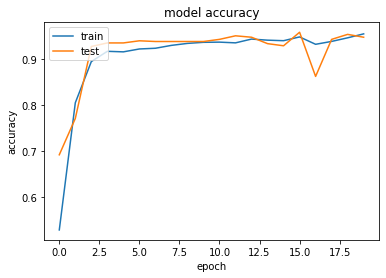

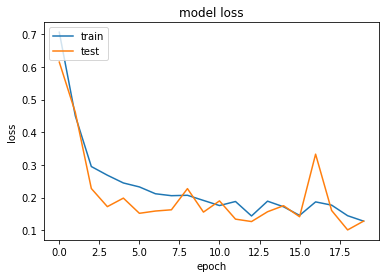

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min',verbose = 1
                   ,patience=5
                   )



history = model_D.fit(train_generator, epochs=20, batch_size=16, 
                    # class_weight=class_weight, 
                    verbose=VERBOSITY,
                          validation_data=test_generator)
                    #   ,callbacks=[es])

# model.fit(train_generator_aug, epochs=EPOCHS, batch_size=BATCH_SIZE, class_weight=class_weight)
HistoryPlotter(history)

In [ ]:
model_D.evaluate(train_generator)

159/159 [==============================] - 30s 190ms/step - loss: 0.0946 - accuracy: 0.9607 - mean_squared_error: 0.0269


[0.0945904403924942, 0.960676372051239, 0.026855871081352234]

(1, 224, 224, 3)
pre [[0.02172195]]
(1, 224, 224, 3)


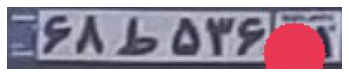

In [ ]:
image = mpimg.imread(os.path.join(DATA_TRAIN_PATH, '1/0001.jpg'))
plt.imshow(image)
image = np.resize(image,(224,224,3))
image = np.expand_dims(image, axis=0)
print(np.shape(image))
print("pre",model_D.predict(image))
print(image.shape)
plt.axis('off')
plt.show()

In [ ]:
predictions = model_D.predict_generator(
    train_generator,
    verbose=1,
    steps=math.ceil(train_generator.samples/train_generator.batch_size))
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = train_generator.classes
class_labels = list(train_generator.class_indices.keys())  

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


159/159 [==============================] - 30s 187ms/step


              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1362
           1       0.00      0.00      0.00      1181

    accuracy                           0.54      2543
   macro avg       0.27      0.50      0.35      2543
weighted avg       0.29      0.54      0.37      2543

0 : 0
1 : 1


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


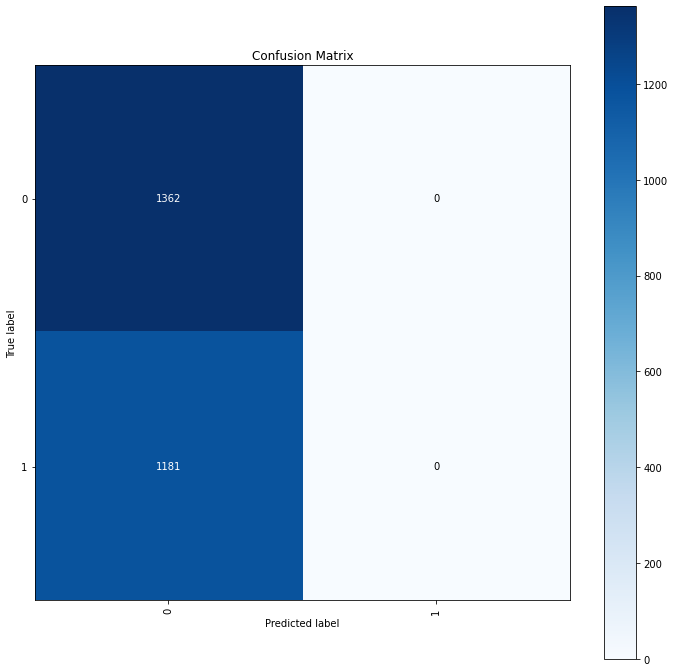

In [ ]:
PlotMany(predicted_classes, true_classes, predictions)
PlotConfusionMatrix(class_labels, true_classes)

In [ ]:
# model.evaluate(test_generator, batch_size=BATCH_SIZE)
model_pred = model.predict_generator(test_generator, steps=2)

# y_pred_bool = np.argmax(y_pred, axis=1)
f1 = f1_score(test_generator, model_pred, average='macro')
print(f1)

print(classification_report(y_test, y_pred_bool))